# Restaurant Sales EDA

## Introduction

### About the Dataset

This dataset contains data from approximately 1000 orders from a single restaurant. It includes granular information such as `item_name`, `item_type`, `quantity` sold, `transaction_amount`, `date` and `time_of_sale`, the `transaction_type` (e.g., dine-in, takeaway), and the `received_by` staff member. This rich dataset provides a foundation for understanding the restaurant's operational dynamics and sales performance over time.

### Analysis objectives

- View variables with greater impact on demand and revenue
- View days and times with greater demand


## Data Preparation

### Data Loading

In [1]:
# Importing the Pandas library
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/fast-food-sales-report/Balaji Fast Food Sales.csv")

In [3]:
# Previewing the data
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### Data Cleaning

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


**Initial observations**:
- There are null values in the `transaction_type` column, representing more than 10% of the data.
- Categorical columns are in `object` format.
- The `date` column has inconsistent data regarding the date format.
- It is important for the analysis to extract the year, month, and weekday from the `date` column.

In [5]:
# Replacing null values with the 'Unknown' category
df["transaction_type"] = df["transaction_type"].fillna("Unknown")

In [6]:
# Adjusting categorical variables
category_columns = [
    "item_name",
    "item_type",
    "transaction_type",
    "received_by",
    "time_of_sale",
]
df[category_columns] = df[category_columns].astype("category")

In [7]:
# Adjusting the date variable to datetime
df["date"] = df["date"].str.replace("/", "-", regex=False)
df["date"] = pd.to_datetime(df["date"], format="%m-%d-%Y")

In [8]:
# Extracting year, month, and weekday from date
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month_name()
df["weekday"] = df["date"].dt.day_name()

In [9]:
# Final result
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,weekday
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night,2022,July,Sunday
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022,August,Tuesday
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022,November,Sunday
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023,February,Friday
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022,October,Sunday


## Sales Analysis

### Performance by Category

Table of quantity and revenue by category.

In [10]:
# Quantity and revenue by category
df_category_orders = df.groupby("item_type", observed=True)[["quantity", "transaction_amount"]].sum()
df_category_orders

,quantity,transaction_amount
item_type,,
Beverages,2639,86390
Fastfood,5523,188840


Graph representing the percentage of quantity and revenue by category.

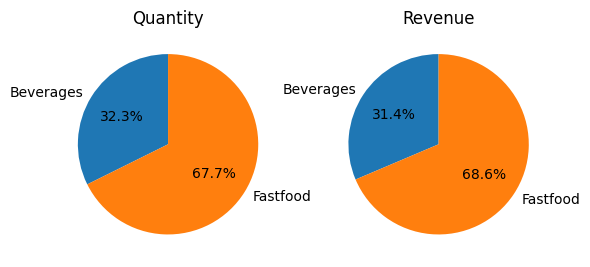

In [11]:
# Graph of quantity and revenue by category
df_category_orders.plot(
    title=["Quantity", "Revenue"],
    kind="pie",
    subplots=True,
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    legend=False,
);

It is concluded that **Fastfood** is the category with the greatest impact on quantity and revenue.

### Performance by Item

Table of quantity and revenue by item.

In [12]:
# Quantity and revenue by item
df_item_orders = df.groupby("item_name", observed=True)[["quantity", "transaction_amount"]].sum()
df_item_orders

,quantity,transaction_amount
item_name,,
Aalopuri,1044,20880
Cold coffee,1361,54440
Frankie,1150,57500
Panipuri,1226,24520
Sandwich,1097,65820
Sugarcane juice,1278,31950
Vadapav,1006,20120


Graph representing the percentage of quantity and revenue by item.

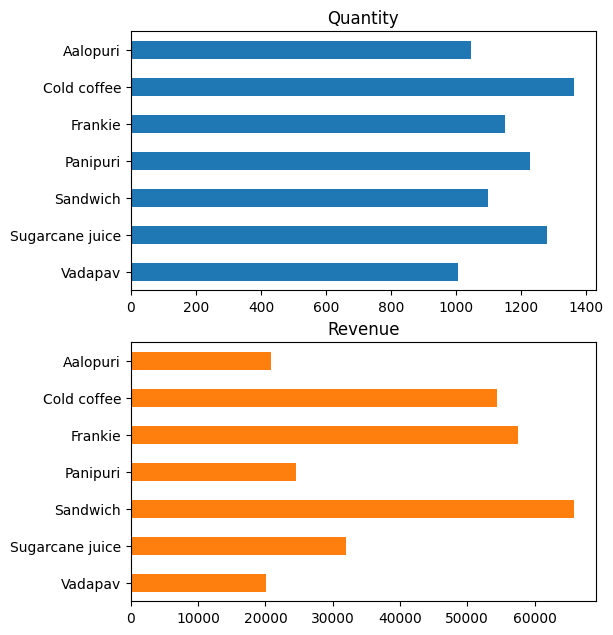

In [13]:
# Graph of quantity and revenue by item
df_item_orders.sort_values(by="item_name", ascending=False).plot(
    y=["quantity", "transaction_amount"],
    title=["Quantity", "Revenue"],
    kind="barh",
    subplots=True,
    ylabel="",
    legend=False,
    sharey=False,
    sharex=False,
    figsize=(6, 7.4),
);

It is concluded that **Cold coffee** has a greater impact on the quantity sold, while **Sandwich** has a greater impact on revenue.

## Salesperson Analysis

Table of orders and revenue by salesperson.

In [14]:
# Orders and revenue by salesperson
df_received_by = df.groupby("received_by", observed=True)
received_by_agg = df_received_by.agg(
    {
        "received_by": "count",
        "transaction_amount": "sum"
    }
)

received_by_agg

,received_by,transaction_amount
received_by,,
Mr.,512,143440
Mrs.,488,131790


Graph representing the percentage of orders and revenue by salesperson.

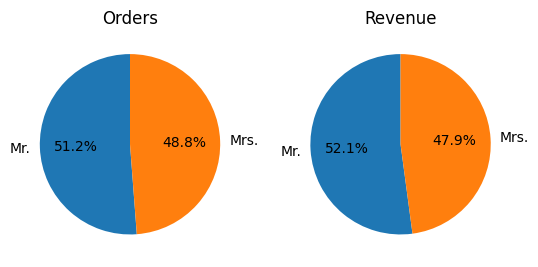

In [15]:
# Graph of orders and revenue by salesperson
received_by_agg.plot(
    title=["Orders", "Revenue"],
    kind="pie",
    subplots=True,
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    legend=False,
);

It is concluded that **Mr.** received more orders and generated more revenue.

## Time-based Analysis

### Annual Performance

Count of orders by year.

In [16]:
# Orders by year
df.groupby("year")["order_id"].count().reset_index()

,year,order_id
0,2022,746
1,2023,254


Quantity of items, orders, and revenue by year.

In [17]:
# Items, orders, and revenue by year
df_orders_year = df.groupby("year")
order_year_agg = df_orders_year.agg(
    {
        'quantity': 'sum',
        'year': 'count',
        'transaction_amount': 'sum'
    }
)

order_year_agg

,quantity,year,transaction_amount
year,,,
2022,5954,746,195575
2023,2208,254,79655


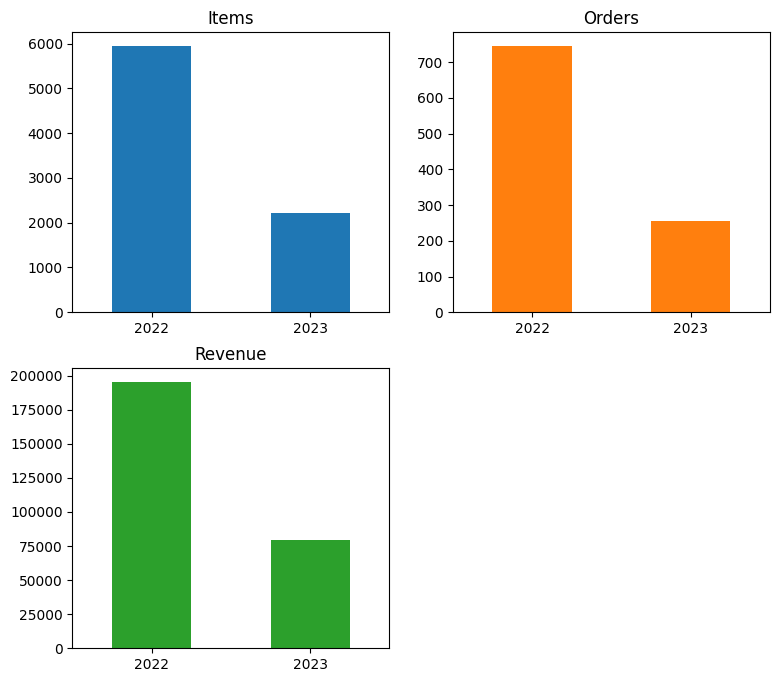

In [18]:
# Graph of items, orders, and revenue by year
order_year_agg.plot(
    title=["Items", "Orders", "Revenue"],
    kind="bar",
    subplots=True,
    ylabel="",
    xlabel="",
    legend=False,
    layout=(2, 2),
    figsize=(9, 8),
    sharex=False,
    rot=0,
);

It is concluded that the year **2022** had the best performance. However, this is due to the greater amount of data available for that year.

### Monthly Performance between 2022 and 2023

Graph of monthly performance by quantity and revenue.

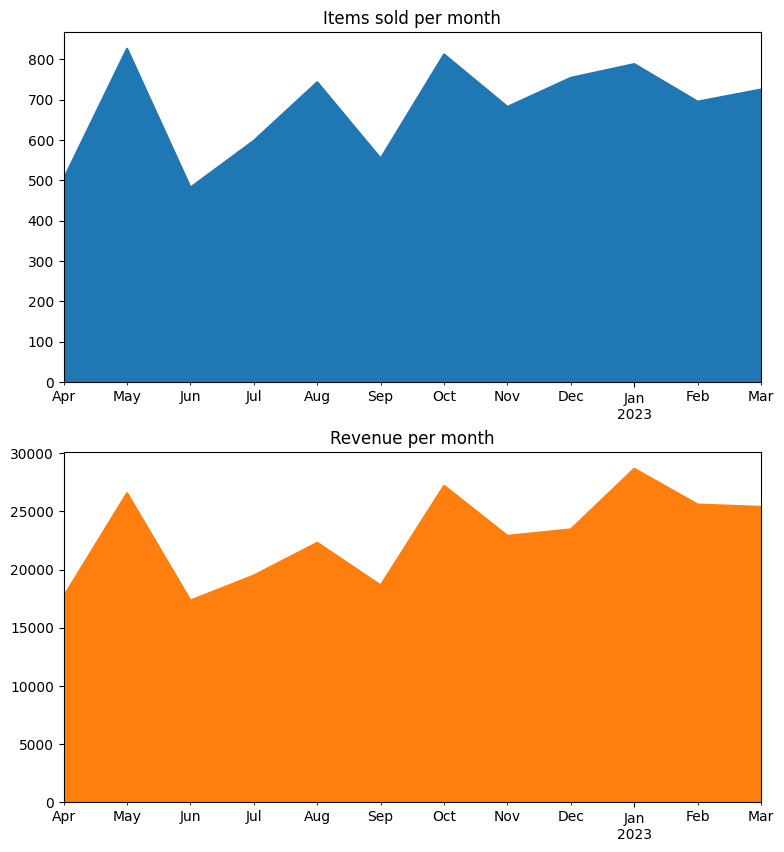

In [19]:
# Graph of monthly performance by item and revenue
month_group = df[["date", "quantity", "transaction_amount"]].set_index("date")
month_sample = month_group.resample("ME").sum()

month_sample.plot(
    title=["Items sold per month", "Revenue per month"],
    kind="area",
    subplots=True,
    ylabel="",
    xlabel="",
    legend=False,
    figsize=(9, 10),
    sharex=False,
);

It is concluded that **May 2023** was the month with the highest number of items sold. While **January 2022** was the month with the highest revenue.

### Weekly Performance

Table of orders and revenue by Month

In [20]:
# Orders and revenue by weekday
df_weekday = df.groupby("weekday")[["order_id", "transaction_amount"]]
weekday_agg = df_weekday.agg(
    {
        "order_id": "count",
        "transaction_amount": "sum"
    }
).reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

weekday_agg

,order_id,transaction_amount
weekday,,
Sunday,158,43970
Monday,141,40930
Tuesday,122,36085
Wednesday,159,40380
Thursday,136,39905
Friday,134,36050
Saturday,150,37910


Graph of orders and revenue by weekday.

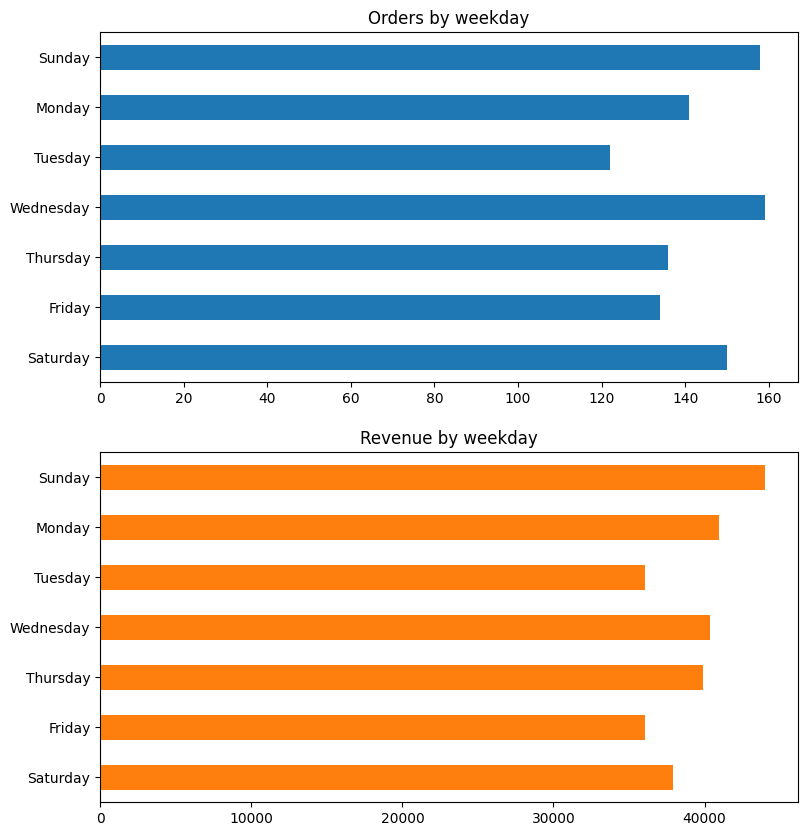

In [21]:
# Quantity and revenue by weekday
weekday_agg.reset_index().sort_index(ascending=False).plot(
    title=["Orders by weekday", "Revenue by weekday"],
    x="weekday",
    xlabel="",
    ylabel="",
    kind="barh",
    subplots=True,
    sharex=False,
    legend=False,
    figsize=(9, 10)
);

It is concluded that **Wednesday** is the day with the highest demand, while **Sunday** is the day with the highest revenue.